# <font color = brown>PRDL & MLLB courses ETSIT - UPM</font>
> <font color=orange size= 4>Some examples of ML models for extreme OSA cases classification</font>
---


* ### We will use the data in: OSA_extreme_male.xlsx</font>




---
---
Load : OSA_extreme_male.xlsx  from your Laptop



In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving OSA_extreme_male.xlsx to OSA_extreme_male.xlsx
User uploaded file "OSA_extreme_male.xlsx" with length 19282 bytes


In [2]:
ls

OSA_extreme_male.xlsx  sample_data/


---

### Read the *OSA_extreme_male.xlsx* file

In [18]:
# Import pandas
import pandas as pd

# Read OSA_DB_UPM.xlsx
df_OSA_male_extreme = pd.read_excel("OSA_extreme_male.xlsx")


In [19]:
df_OSA_male_extreme.head(10)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906
2,P0007,hombre,34.0,86,169,39,42,Severe,30.110991
3,P0008,hombre,60.0,145,172,47,44,Severe,49.012980
4,P0013,hombre,3.7,90,180,36,40,Healthy,27.777778
5,P0020,hombre,4.3,89,171,44,45,Healthy,30.436716
6,P0022,hombre,56.0,113,177,33,46,Severe,36.068818
7,P0024,hombre,53.6,107,170,48,46,Severe,37.024221
8,P0025,hombre,2.1,70,174,53,38,Healthy,23.120624
9,P0027,hombre,47.0,100,180,62,48,Severe,30.864198


* # Indicate the features we will use

In [20]:
### Picking predictor columns

# Get all the columns from the dataframe.
columns = df_OSA_male_extreme.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Patient","Gender","IAH","OSA"]]

# Store the variable we'll be predicting on.
target = "OSA"

print('Predictors: ',columns)

Predictors:  ['Weight', 'Height', 'Age', 'Cervical', 'BMI']


## We will use data (our features) as Numpy arrays

In [21]:
import numpy as np

X = np.array(df_OSA_male_extreme[columns])


In [22]:
X.shape

(278, 5)

In [23]:
print(X[0:4])

[[ 80.         173.          32.          40.          26.7299275 ]
 [109.         190.          32.          42.          30.19390582]
 [ 86.         169.          39.          42.          30.11099051]
 [145.         172.          47.          44.          49.01297999]]


In [24]:
df_OSA_male_extreme[columns][0:4]

,Weight,Height,Age,Cervical,BMI
0,80,173,32,40,26.729927
1,109,190,32,42,30.193906
2,86,169,39,42,30.110991
3,145,172,47,44,49.012980


# The outcome "y" will have two values: binary classification

* # we can map "Healthy" to "0" and "Severe" to "1"
## We use a Python dictionary {'Healthy': 0, 'Severe': 1}

In [26]:
df_OSA_male_extreme.OSA = df_OSA_male_extreme.OSA.map({'Healthy': 0, 'Severe': 1})

In [27]:
df_OSA_male_extreme.head()

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,0,26.729927
1,P0006,hombre,2.0,109,190,32,42,0,30.193906
2,P0007,hombre,34.0,86,169,39,42,1,30.110991
3,P0008,hombre,60.0,145,172,47,44,1,49.012980
4,P0013,hombre,3.7,90,180,36,40,0,27.777778


In [28]:
y = np.array(df_OSA_male_extreme['OSA'])

In [29]:
y[0:4]

array([0, 0, 1, 1])

# For this example we will follow a simple approach: 85% data for training and 15% for testing
* # BUT it is very important to know about CROSSVALIDATION
# and in particular: Nested or Double Loop Crossvalidation as we have to tune hiperparameters, you can read this blog:

https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/

---
---
# In next cells we follow a similar approach as in:
https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [32]:
print('Training data cases: ', len(X_train), ' Test data cases: ', len(X_test))

Training data cases:  236  Test data cases:  42


* # We will start using <font color = magenta>**Logistic Regression**</font> in  [Scikit Learn Package](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)




In [33]:
from sklearn.linear_model import LogisticRegression

# Note the parameters (hyperparameters) you must consider

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Now that the model is trained we can predict some cases:

In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

# Compare Predictions with True values

In [37]:
y_pred[0:4]

array([0, 0, 1, 1])

In [38]:
y_test[0:4]

array([0, 0, 0, 1])

# You can also get the "probabilities" for each prediction for each class

In [39]:
y_pred_proba = model.predict_proba(X_test)

In [40]:
# Two values: prob of "0" (Healthy) prob of "1" Severe (add up 1!)

y_pred_proba[0:4]

array([[0.60174556, 0.39825444],
       [0.761483  , 0.238517  ],
       [0.42196176, 0.57803824],
       [0.34205889, 0.65794111]])

# Now you can explore using several evaluation metrics, confussion matrix, etc...

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

---
---

# Be carefull with the number of decimal when you Report your results:
> ## <font color = red> Only few (1 or 2) decimals are statistically significant</font>



In [41]:
from sklearn import metrics

In [42]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('Accuracy Score : ' + str(metrics.accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred)))
print('F1 Score : ' + str(metrics.f1_score(y_test,y_pred)))

Accuracy: 0.8333333333333334
Accuracy Score : 0.8333333333333334
Precision Score : 0.9166666666666666
Recall Score : 0.6470588235294118
F1 Score : 0.7586206896551724


* # The Confusion Matriz

In [43]:
import matplotlib.pyplot as plt

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [44]:
cnf_matrix

array([[24,  1],
       [ 6, 11]])

Text(0.5, 23.52222222222222, 'Predicted')

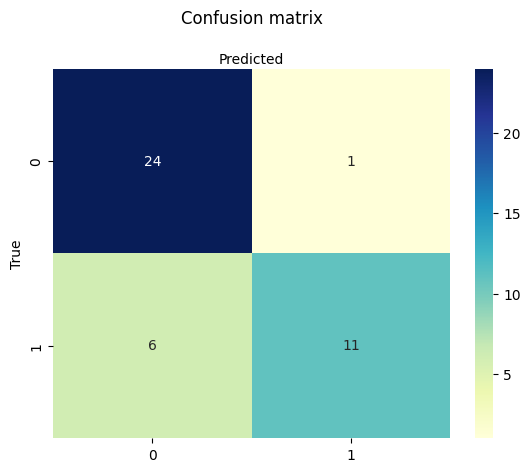

In [45]:
import seaborn as sns

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# .... now you can try and compare other models.... use hyperparameyters selection etc...

* ## You can follow scikit learn documentation and examples, as this:
  https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py

# .... Crossvalidation  K-fold (in the example K = 3)

In [46]:
import numpy as np

model = LogisticRegression()

K = 3

# Create a list X_folds with data for each fold
X_folds = np.array_split(X, K)
y_folds = np.array_split(y, K)
scores = list()
for k in range(K):

  # We use 'list' to copy, in order to 'pop' (extract one fold) later on
  X_train_cv = list(X_folds)
  X_test_cv = X_train_cv.pop(k)
  X_train_cv = np.concatenate(X_train_cv)
  y_train_cv = list(y_folds)
  y_test_cv = y_train_cv.pop(k)
  y_train_cv = np.concatenate(y_train_cv)
  scores.append(model.fit(X_train_cv, y_train_cv).score(X_test_cv, y_test_cv))

print(scores)

[0.7419354838709677, 0.6881720430107527, 0.6413043478260869]


# ...an example of Grid Search (we follow the blog below)
https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e

 ## The hyperparameters we tuned are:

> Penalty: l1 (The lasso) or l2 (Ridge) specify the type of REGULARIZATION

> C: Inverse of regularization strength- smaller values of C specify stronger regularization.

Also, in Grid-search function, we have the scoring parameter where we can specify the metric to evaluate the model on (We have chosen "recall" as the metric). From the confusion matrix below, we can see that the number of false negatives has been reduced.

In [47]:
#Grid Search

from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l2'],'C':[0.001,.009,0.01, 0.02, .09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.02, 0.09, 1, 5, 10, 25],
                         'penalty': ['l2']},
             scoring='recall')

In [48]:
grid_clf_acc.best_estimator_

LogisticRegression(C=0.01)

In [49]:
#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics
print('Accuracy Score : ' + str(metrics.accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(metrics.f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.7857142857142857
Precision Score : 0.9
Recall Score : 0.5294117647058824
F1 Score : 0.6666666666666667


Text(0.5, 23.52222222222222, 'Predicted')

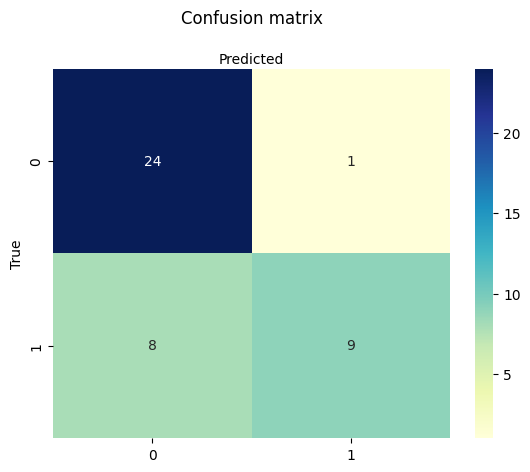

In [50]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_acc)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')


# Know what is the Receiver operating characteristic (ROC) curve

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay  

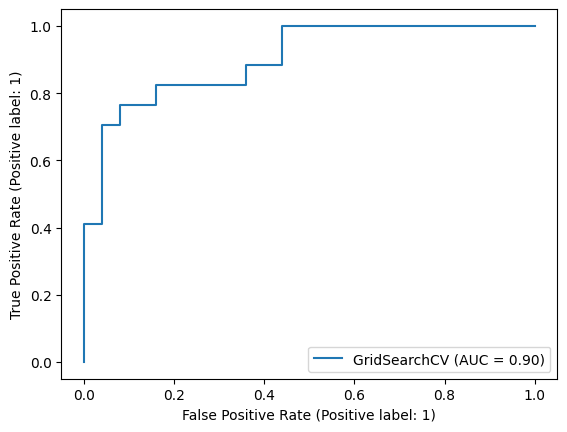

In [67]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(grid_clf_acc, X_test, y_test)


---
---

# IMPORTANT

* ### Learn how to obtain the fp, tp, the <font color = red> AUC: Area Under The curve</end>

> ####  fpr, tpr, thresholds = metrics.roc_curve(y, pred)

> #### roc_auc = metrics.auc(fpr, tpr)

##### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay

# ...you can exteend the basics ideas we have seen so far, and also easily explore other ML models RF, XGBoost, SVM, etc...

---
---
# Below you can see an example using RF Classifier

(Similar to: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
)

# In this example they:
* ## Firts use random search
* ## And then GridSearch around the possible best values...



In [68]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint

rf = RandomForestClassifier()

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [69]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [70]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

## We can view the best parameters from fitting the random search:

In [71]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [72]:
best_random = rf_random.best_estimator_

In [73]:
#Predict values based on new parameters
y_pred_acc = best_random.predict(X_test)

# New Model Evaluation metrics
print('Accuracy Score : ' + str(metrics.accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(metrics.f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.7857142857142857
Precision Score : 0.7222222222222222
Recall Score : 0.7647058823529411
F1 Score : 0.7428571428571428


Text(0.5, 23.52222222222222, 'Predicted')

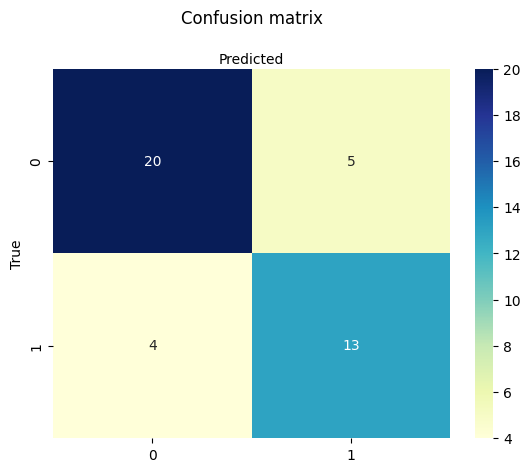

In [74]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_acc)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')


* ## Plot the ROC curve of the best RF model up to this point

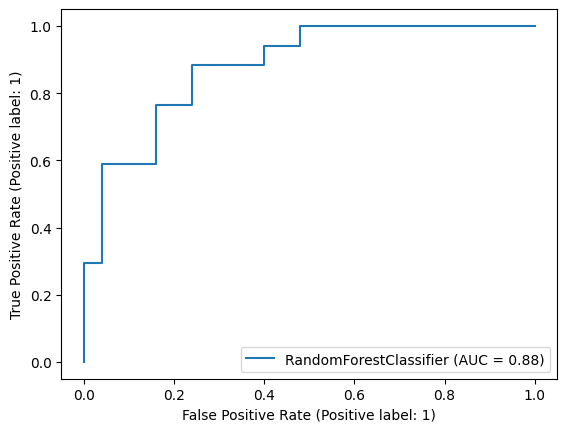

In [75]:
RocCurveDisplay.from_estimator(best_random, X_test, y_test)

# Now you can try a "narrow tunning" using Grid Search with Cross Validation

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

In [76]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [77]:
from sklearn.model_selection import GridSearchCV


# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 70, 80, 90, 100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [1200, 1400, 1800]

}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [78]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [60, 70, 80, 90, 100],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [1200, 1400, 1800]},
             verbose=2)

* # see best hyperparameters

In [79]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 1200}

* # Evaluate the best model

In [80]:
#Predict values based on new parameters
best_grid = grid_search.best_estimator_
y_pred_acc = best_grid.predict(X_test)

# New Model Evaluation metrics
print('Accuracy Score : ' + str(metrics.accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(metrics.f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.7619047619047619
Precision Score : 0.6842105263157895
Recall Score : 0.7647058823529411
F1 Score : 0.7222222222222222


Text(0.5, 23.52222222222222, 'Predicted')

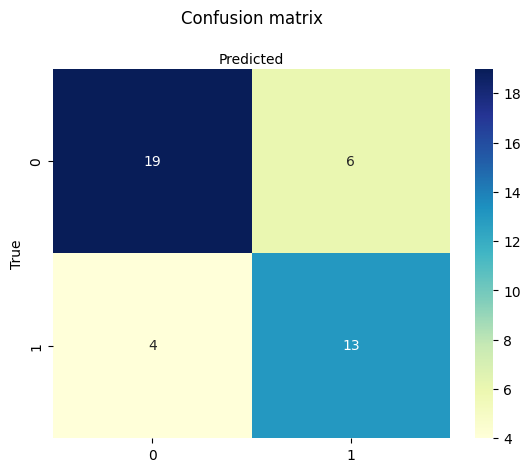

In [81]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_acc)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')


* ## Plot the ROC curve of the best RF model w eget in this Notebook

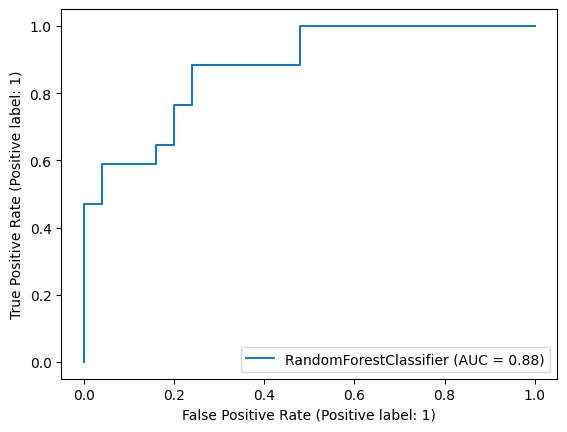

In [82]:
RocCurveDisplay.from_estimator(best_grid, X_test, y_test)